In [61]:
import warnings
warnings.filterwarnings("ignore", message = r"Passing", category = FutureWarning)
import os
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import seaborn

In [62]:
train_path = r"C:\Users\ANKIT SINGH\Desktop\Face_recognition\dataset\train"
test_path = r"C:\Users\ANKIT SINGH\Desktop\Face_recognition\dataset\test"

In [63]:
dim = 162

In [64]:
def data_label(path):
    data = []
    label = []
    for i in os.listdir(path):
        for j in os.listdir(path + '/' + i):
            img_path = path + '/' + i + '/' + j
            img = PIL.Image.open(img_path).convert("L")
            img = img.resize((dim, dim))
            img = np.array(img)
            img = img.reshape((162,162,1))
            data.append(img)
            if i == "0":
                label.append(0)
            elif i == "1":
                label.append(1)
            else:
                pass
    data = np.array(data)
    return(data, label)

In [65]:
train_data, train_label = data_label(train_path)
test_data, test_label = data_label(test_path)

In [66]:
train_data = np.array(train_data).reshape(-1, 162, 162, 1)

train_label = np.array(train_label)

In [67]:
test_data = np.array(test_data).reshape(-1, 162, 162, 1)

test_label = np.array(test_label)

In [68]:
print(train_data.shape)
print(len(train_label))
print(test_data.shape)
print(len(test_label))

(2087, 162, 162, 1)
2087
(336, 162, 162, 1)
336


In [69]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(10, (5, 5), strides = 3, activation = 'relu', input_shape = (dim, dim, 1), ))
model.add(keras.layers.MaxPooling2D((3, 3)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(10, (3, 3), strides = 2, activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 53, 53, 10)        260       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 10)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 17, 17, 10)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 4, 4, 10)         

In [70]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [71]:
history = model.fit(train_data, train_label, batch_size=16, epochs = 50, verbose = 1, validation_data = (test_data, test_label))

Epoch 1/50
131/131 [==============================] - 2s 9ms/step - loss: 2.4796 - acc: 0.6306 - val_loss: 0.6498 - val_acc: 0.6667
Epoch 2/50
131/131 [==============================] - 1s 8ms/step - loss: 0.6270 - acc: 0.7580 - val_loss: 0.6234 - val_acc: 0.6756
Epoch 3/50
131/131 [==============================] - 1s 8ms/step - loss: 0.4476 - acc: 0.8342 - val_loss: 0.4293 - val_acc: 0.7946
Epoch 4/50
131/131 [==============================] - 1s 8ms/step - loss: 0.3502 - acc: 0.8649 - val_loss: 0.3272 - val_acc: 0.8304
Epoch 5/50
131/131 [==============================] - 1s 8ms/step - loss: 0.2864 - acc: 0.8869 - val_loss: 0.3031 - val_acc: 0.8393
Epoch 6/50
131/131 [==============================] - 1s 8ms/step - loss: 0.2460 - acc: 0.9133 - val_loss: 0.2531 - val_acc: 0.8810
Epoch 7/50
131/131 [==============================] - 1s 8ms/step - loss: 0.2164 - acc: 0.9243 - val_loss: 0.2762 - val_acc: 0.8601
Epoch 8/50
131/131 [==============================] - 1s 8ms/step - loss: 0.

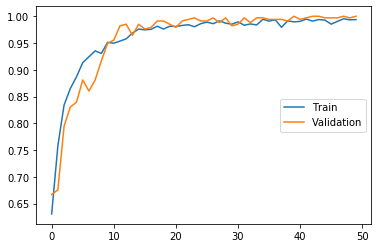

In [72]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

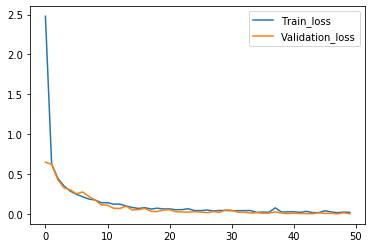

In [73]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(['Train_loss', 'Validation_loss'], loc='upper right')
plt.show()

In [74]:
test_loss, test_acc = model.evaluate(test_data, test_label)
print("Test Accuracy:", test_acc)

11/11 [==============================] - 0s 4ms/step - loss: 0.0021 - acc: 1.0000
Test Accuracy: 1.0


In [75]:
pred = model.predict(test_data, steps = 1)
pred

1/1 [==============================] - 0s 102ms/step


array([[4.68000838e-09],
       [2.10906435e-07],
       [1.79133777e-10],
       [1.28711129e-13],
       [1.37964983e-17],
       [1.08726773e-07],
       [1.59721800e-08],
       [1.21077108e-04],
       [4.42872440e-11],
       [6.71035227e-09],
       [6.90306373e-14],
       [3.06246619e-08],
       [2.16166249e-08],
       [1.05632727e-15],
       [2.13163912e-05],
       [2.37104197e-10],
       [1.34951342e-02],
       [8.16238668e-08],
       [1.82815203e-08],
       [1.37493072e-11],
       [2.89418062e-06],
       [3.36332741e-05],
       [3.41538997e-09],
       [8.88173963e-05],
       [4.86524414e-07],
       [4.71154226e-06],
       [1.50182877e-05],
       [6.83877806e-06],
       [2.38506145e-05],
       [9.31479349e-07],
       [1.65056380e-09],
       [2.35847529e-06],
       [7.37532559e-08],
       [8.00276175e-05],
       [3.23487329e-05],
       [6.81574079e-07],
       [2.18626928e-06],
       [1.18030561e-03],
       [5.53965585e-09],
       [6.73538203e-09],


In [76]:
r_pred = []
for i in range(len(pred)):
    if pred[i] >= 0.5:
        r_pred.append(1)
    else:
        r_pred.append(0)

In [77]:
data = {'Prediction' : r_pred, 'Actual' : test_label}

In [78]:
df = pd.DataFrame(data)
df

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
331,1,1
332,1,1
333,1,1
334,1,1


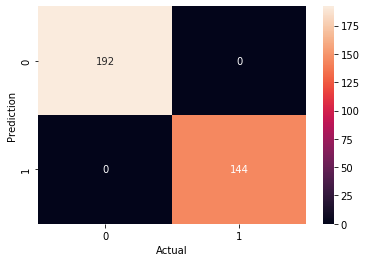

In [79]:
cm = pd.crosstab(df.Prediction, df.Actual)
seaborn.heatmap(cm, annot = True, fmt = '.0f')

In [80]:
(190+175)/372

0.9811827956989247

In [91]:
# def SinglePred(file):
#     im = PIL.Image.open(file)
#     im = im.resize((dim, dim))
#     array = np.asarray(im)
#     array = np.reshape(array, (-1,dim, dim, 1))
#     plt.imshow(im)
#     x = model.predict(array)
#     if (x >= 0.5):
#         print('ANKIT')
#     else:
#         print('No_Anomaly')

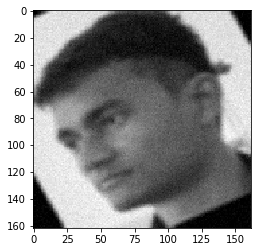

1/1 [==============================] - 0s 48ms/step
ANKIT


In [103]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming 'model' is already defined and loaded somewhere in your code

def SinglePred(file_path):
    # Load and preprocess the image
    im = load_img(file_path, color_mode='grayscale', target_size=(162, 162))  # Load image in grayscale
    array = img_to_array(im)
    array = np.expand_dims(array, axis=0)
    
    # Display the image
    plt.imshow(im, cmap='gray')
    plt.show()
    
    # Make a prediction
    prediction = model.predict(array)
    
    # Convert prediction to a single scalar value if necessary
    prediction_value = prediction[0, 0]  # Adjust indexing as per your model's output shape
    
    # Check the prediction
    if prediction_value >= 0.5:
        print('ANKIT')
    else:
        print('Not ANKIT')

# Example usage
SinglePred(r"C:\Users\ANKIT SINGH\Desktop\Face_recognition\dataset\test\1\ankit(4)_aug_11.png")


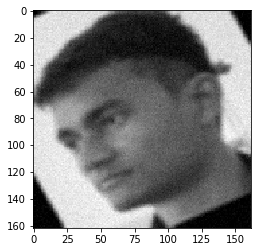

1/1 [==============================] - 0s 13ms/step
ANKIT


In [104]:
SinglePred(r"C:\Users\ANKIT SINGH\Desktop\Face_recognition\dataset\test\1\ankit(4)_aug_11.png")

No_Anomaly


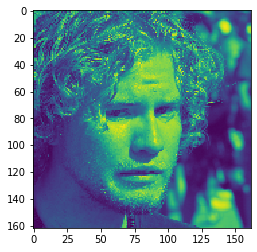

In [46]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\AI Projects\Face Id Detection\dataset\Test\0\01045.png")

Ravindra


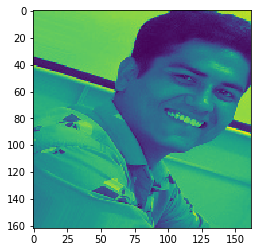

In [43]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\AI Projects\Face Id Detection\dataset\Test\1\ravi (23)_augmented14.jpg")

No_Anomaly


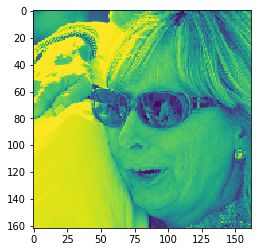

In [39]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\AI Projects\Face Id Detection\dataset\Test\0\01077.png")

Ravindra


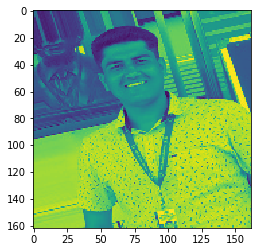

In [32]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\AI Projects\Face Id Detection\dataset\Test\1\ravi (40)_augmented19.jpg")

Ravindra


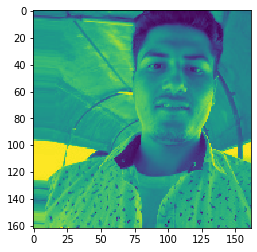

In [49]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\AI Projects\Face Id Detection\dataset\Test\1\ravi (300).jpg")

In [105]:
model.save("ankit_face_5k.h5")